## 3

/var/folders/v6/6y0yhn4s6q5__vc20n40cx140000gn/T/ipykernel_30098/136064996.py:14: RuntimeWarning: divide by zero encountered in log2
  return -(p_m1 * np.log2(p_m1) + p_m2 * np.log2(p_m2))
/var/folders/v6/6y0yhn4s6q5__vc20n40cx140000gn/T/ipykernel_30098/136064996.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  return -(p_m1 * np.log2(p_m1) + p_m2 * np.log2(p_m2))


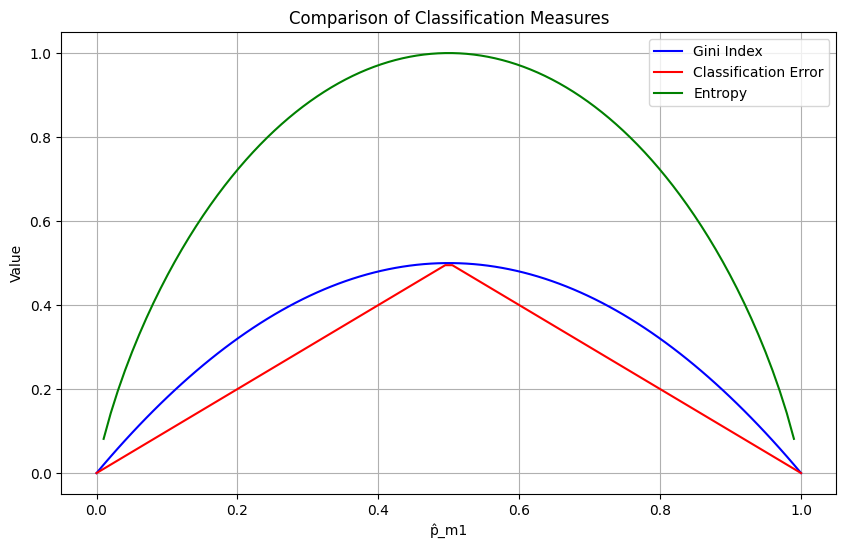

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def gini(p_m1):
    p_m2 = 1 - p_m1
    return 2 * p_m1 * p_m2

def classification_error(p_m1):
    p_m2 = 1 - p_m1
    return min(p_m1, p_m2)

def entropy(p_m1):
    p_m2 = 1 - p_m1
    return -(p_m1 * np.log2(p_m1) + p_m2 * np.log2(p_m2))


p_m1_values = np.linspace(0, 1, 100)

gini_values = [gini(p) for p in p_m1_values]
classification_error_values = [classification_error(p) for p in p_m1_values]
entropy_values = [entropy(p) for p in p_m1_values]


plt.figure(figsize=(10, 6))

plt.plot(p_m1_values, gini_values, label='Gini Index', color='blue')
plt.plot(p_m1_values, classification_error_values, label='Classification Error', color='red')
plt.plot(p_m1_values, entropy_values, label='Entropy', color='green')

plt.xlabel('p̂_m1')
plt.ylabel('Value')
plt.title('Comparison of Classification Measures')
plt.legend()
plt.grid(True)
plt.show()


## 8

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [60]:

# Load the dataset
carseats_df = pd.read_csv('/Users/rj/Downloads/carseats.csv')

carseats_df['ShelveLoc'].value_counts()
label_map = {'Good': 2, 'Bad': 0, 'Medium': 1}
carseats_df['ShelveLoc'] = carseats_df['ShelveLoc'].map(label_map)
label_map1 = {'Yes': 1, 'No': 0}
carseats_df['Urban'] = carseats_df['Urban'].map(label_map1)
carseats_df['US'] = carseats_df['US'].map(label_map1)
carseats_df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [61]:


# (a) Split the data set into a training set and a test set
X = carseats_df.drop(columns=['Sales'])
y = carseats_df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Test MSE for Decision Tree: 6.581077500000001


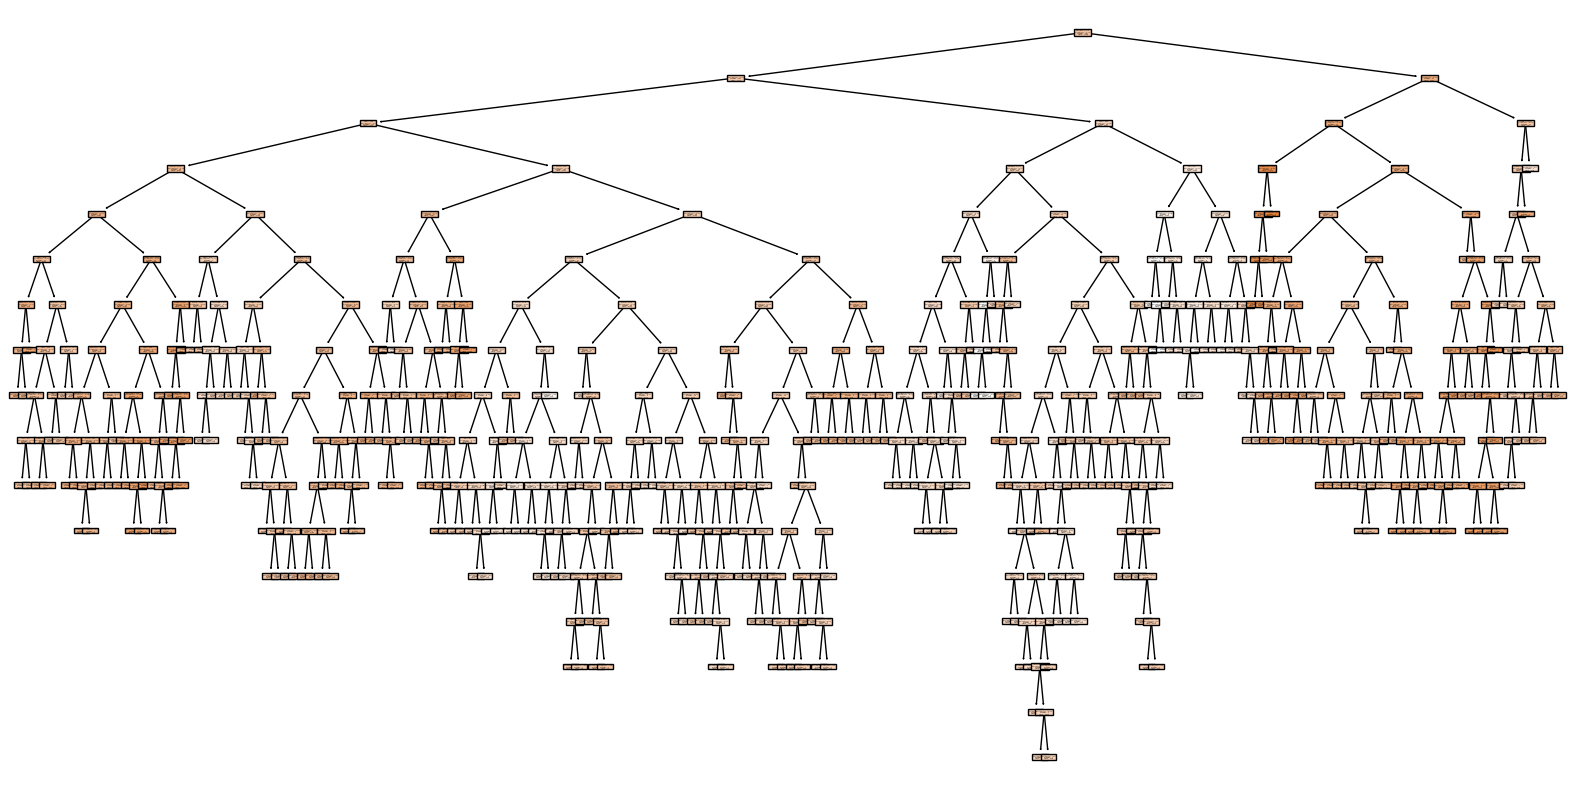

In [62]:

# (b) Fit a regression tree to the training set
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_pred)
print("Test MSE for Decision Tree:", tree_mse)


plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns)
plt.show()



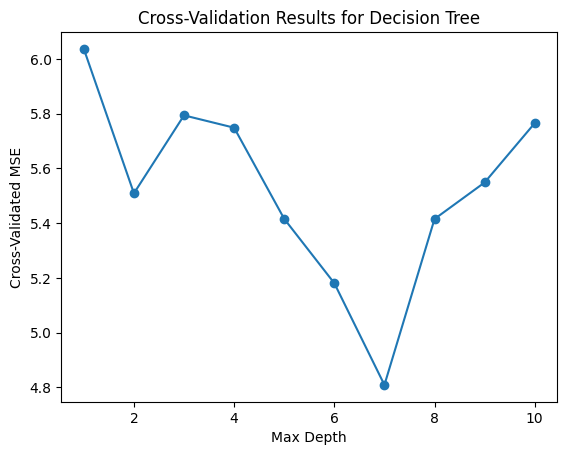

In [63]:

# (c) Cross-validation to determine the optimal level of tree complexity
# Let's iterate over different max_depth values and use cross-validation to find the optimal one
depths = range(1, 11)
cv_scores = []

for depth in depths:
    tree_model = DecisionTreeRegressor(max_depth=depth)
    scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-np.mean(scores))


plt.plot(depths, cv_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validation Results for Decision Tree')
plt.show()


It does improve the MSE it lowers the error by .5

In [64]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# (d) Use the bagging approach to analyze the data
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

bagging_mse = mean_squared_error(y_test, bagging_pred)
print("Test MSE for Bagging:", bagging_mse)


Test MSE for Bagging: 3.1227133431249987


In [65]:
# (e) Use random forests to analyze the data
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_pred)
print("Test MSE for Random Forest:", forest_mse)

feature_names = X.columns
importances_with_names = list(zip(feature_names, forest_model.feature_importances_))
importances_with_names.sort(key=lambda x: x[1], reverse=True)
print("Feature Importance for Random Forest:")
for feature, importance in importances_with_names:
    print(f"{feature}: {importance}")


Test MSE for Random Forest: 2.8563116033749973
Feature Importance for Random Forest:
Price: 0.3076248756482923
ShelveLoc: 0.24953408429515572
Age: 0.11405230781417805
CompPrice: 0.10227196796573068
Advertising: 0.08774223135552818
Income: 0.05715689800438423
Population: 0.03951348219550604
Education: 0.031164600939590285
Urban: 0.005809368684683243
US: 0.005130183096951306


## 9

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
oj_df = pd.read_csv('/Users/rj/Downloads/oj.csv')
oj_df


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [67]:
oj_df['Store7'] = oj_df['Store7'].map(label_map1)
oj_df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,1,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,1,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,1,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,1,0.112676,0.000000,0.27,0


In [68]:

# (a) Create a training set and a test set
X = oj_df.drop(columns=['Purchase'])
y = oj_df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:

# (b) Fit a tree to the training data
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
train_pred = tree_model.predict(X_train)
train_error_rate = 1 - accuracy_score(y_train, train_pred)
print("Training Error Rate:", train_error_rate)


Training Error Rate: 0.007009345794392496


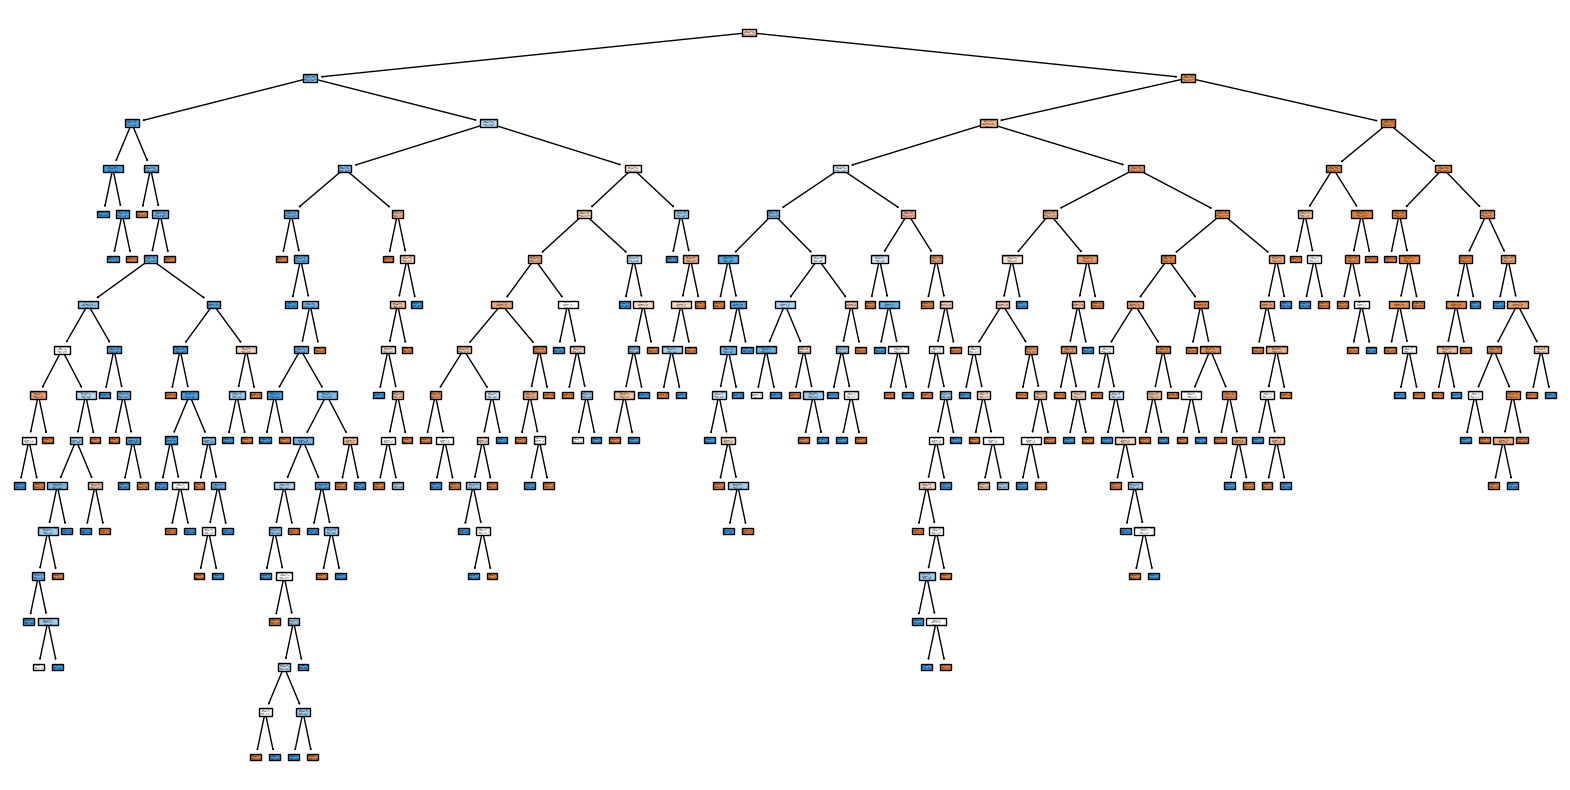

Number of Terminal Nodes: 171


In [70]:

# (c) Plot the tree and interpret the results
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=tree_model.classes_)
plt.show()

# Count terminal nodes
terminal_nodes = tree_model.tree_.n_leaves
print("Number of Terminal Nodes:", terminal_nodes)


In [71]:

# (d) Produce a text summary of the fitted tree
def export_tree(tree, feature_names):
    tree_ = tree.tree_
    threshold = tree_.threshold
    children_left = tree_.children_left
    children_right = tree_.children_right
    features = [feature_names[i] if i != -2 else 'None' for i in tree_.feature]

    print(f"Depth: {tree_.max_depth}, Number of Leaves: {tree_.n_leaves}")
    for i in range(tree_.node_count):
        if children_left[i] == children_right[i]: 
            print(f"Node {i}: Leaf node with class {tree_.value[i]}")
        else:
            print(f"Node {i}: Split on {features[i]} at threshold {threshold[i]}")
export_tree(tree_model, X.columns)



Depth: 16, Number of Leaves: 171
Node 0: Split on LoyalCH at threshold 0.48285000026226044
Node 1: Split on LoyalCH at threshold 0.2761415094137192
Node 2: Split on LoyalCH at threshold 0.060838500037789345
Node 3: Split on WeekofPurchase at threshold 268.5
Node 4: Leaf node with class [[0. 1.]]
Node 5: Split on PriceDiff at threshold 0.28999999165534973
Node 6: Leaf node with class [[0. 1.]]
Node 7: Leaf node with class [[1. 0.]]
Node 8: Split on LoyalCH at threshold 0.06462550163269043
Node 9: Leaf node with class [[1. 0.]]
Node 10: Split on SalePriceMM at threshold 2.259999990463257
Node 11: Split on STORE at threshold 1.5
Node 12: Split on WeekofPurchase at threshold 242.5
Node 13: Split on ListPriceDiff at threshold 0.1849999949336052
Node 14: Split on SalePriceMM at threshold 1.590000033378601
Node 15: Split on LoyalCH at threshold 0.1566310003399849
Node 16: Leaf node with class [[0. 1.]]
Node 17: Leaf node with class [[1. 0.]]
Node 18: Leaf node with class [[1. 0.]]
Node 19: Sp

In [72]:

# (e) Predict the response on the test data and produce a confusion matrix
test_pred = tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)

test_error_rate = 1 - accuracy_score(y_test, test_pred)
print("Test Error Rate:", test_error_rate)


Confusion Matrix:
[[99 31]
 [36 48]]
Test Error Rate: 0.3130841121495327


In [73]:

# (f) Use cross-validation to determine the optimal tree size
cv_scores = []
tree_sizes = range(2, 21)

for size in tree_sizes:
    tree_model = DecisionTreeClassifier(max_leaf_nodes=size)
    scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(1 - np.mean(scores))

for size, error_rate in zip(tree_sizes, cv_scores):
    print(f"Tree Size: {size}, Cross-Validated Error Rate: {error_rate}")


Tree Size: 2, Cross-Validated Error Rate: 0.20212158302733585
Tree Size: 3, Cross-Validated Error Rate: 0.20212158302733585
Tree Size: 4, Cross-Validated Error Rate: 0.20329117367061067
Tree Size: 5, Cross-Validated Error Rate: 0.19158846729226153
Tree Size: 6, Cross-Validated Error Rate: 0.174044607643139
Tree Size: 7, Cross-Validated Error Rate: 0.1775465796273631
Tree Size: 8, Cross-Validated Error Rate: 0.174044607643139
Tree Size: 9, Cross-Validated Error Rate: 0.17404460764313878
Tree Size: 10, Cross-Validated Error Rate: 0.18220454236366113
Tree Size: 11, Cross-Validated Error Rate: 0.18220454236366113
Tree Size: 12, Cross-Validated Error Rate: 0.18220454236366113
Tree Size: 13, Cross-Validated Error Rate: 0.1787161702706378
Tree Size: 14, Cross-Validated Error Rate: 0.18689650482796138
Tree Size: 15, Cross-Validated Error Rate: 0.18805929552563572
Tree Size: 16, Cross-Validated Error Rate: 0.19273085815313473
Tree Size: 17, Cross-Validated Error Rate: 0.19623963008295942
Tree S

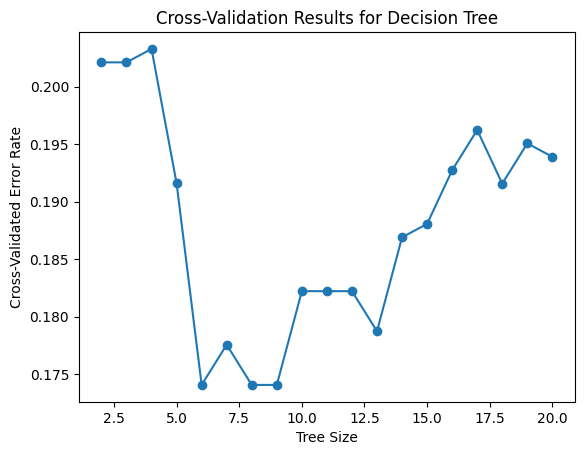

In [74]:

# (g) Plot tree size vs cross-validated classification error rate
plt.plot(tree_sizes, cv_scores, marker='o')
plt.xlabel('Tree Size')
plt.ylabel('Cross-Validated Error Rate')
plt.title('Cross-Validation Results for Decision Tree')
plt.show()


In [75]:

# (h) Find the tree size with the lowest cross-validated error rate
optimal_size = tree_sizes[np.argmin(cv_scores)]
print("Optimal Tree Size:", optimal_size)


Optimal Tree Size: 9


In [76]:

# (i) Produce a pruned tree corresponding to the optimal size
pruned_tree_model = DecisionTreeClassifier(max_leaf_nodes=optimal_size)
pruned_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=9)

In [77]:

# (j) Compare training error rates between pruned and unpruned trees
pruned_train_pred = pruned_tree_model.predict(X_train)
pruned_train_error_rate = 1 - accuracy_score(y_train, pruned_train_pred)
print("Pruned Tree Training Error Rate:", pruned_train_error_rate)


Pruned Tree Training Error Rate: 0.14252336448598135


The prunned error rate is higher

In [78]:

# (k) Compare test error rates between pruned and unpruned trees
pruned_test_pred = pruned_tree_model.predict(X_test)
pruned_test_error_rate = 1 - accuracy_score(y_test, pruned_test_pred)
print("Pruned Tree Test Error Rate:", pruned_test_error_rate)


Pruned Tree Test Error Rate: 0.2009345794392523


The Unprunned error rate is higher